<a href="https://colab.research.google.com/github/saikrishna1108/Introduction-to-Machine-Learning/blob/main/Homework5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Note: please use SGD and ADAM optimizers for each Problem in the homework. Make sure to compare the obtained results between SGD and ADAM.
1. In our temperature prediction example, let’s change our model to a nonlinear system. Consider the following description for our model:

w2 * t_u ** 2 + w1 * t_u + b

1.a Modify the training loop properly to accommodate this redefinition.

1.b Use 5000 epochs for your training. Explore different learning rates from 0.1 to 0.0001 (you need four separate trainings). Report your loss for every 500 epochs per training.

1.c Pick the best non-linear model and compare your final best loss against the linear model that we did during the lecture. For this, visualize the non-linear model against the linear model over the input dataset, as we did during the lecture. Is the actual result better or worse than our baseline linear model?

In [1]:
import torch
import torch.optim as optim
import matplotlib.pyplot as plt

In [2]:
t_c = [0.5, 14.0, 15.0, 28.0, 11.0, 8.0, 3.0, -4.0, 6.0, 13.0, 21.0]
t_u = [35.7, 55.9, 58.2, 81.9, 56.3, 48.9, 33.9, 21.8, 48.4, 60.4, 68.4]
t_c = torch.tensor(t_c)
t_u = torch.tensor(t_u)

In [3]:
def model(t_u,w2,w1,b):
  return w2 * t_u ** 2 + w1 * t_u + b
def loss_funct(t_p, t_c):
    mse = torch.mean((t_p - t_c) ** 2)
    rmse = torch.sqrt(mse)
    return rmse

In [4]:
params = torch.tensor([1.0, 0.0, 0.0], requires_grad=True)
learning_rate1 = 0.0001
optimizer_sgd = optim.SGD([params], lr=learning_rate1)

In [5]:
def training_loop(n_epochs, optimizer, t_u, t_c, params):
    for epoch in range(n_epochs):
        optimizer.zero_grad()
        t_p = model(t_u, *params)
        loss = loss_funct(t_p, t_c)
        loss.backward()
        optimizer.step()

        if (epoch + 1) % 500 == 0:
            print(f"Epoch {epoch + 1}, Loss {float(loss)}")
    return params


with learning rate as 0.0001

In [6]:
n_epochs = 5000
training_loop(n_epochs, optimizer_sgd, t_u, t_c, params)
print("SGD Optimizer Result:", params)

Epoch 500, Loss 148.53912353515625
Epoch 1000, Loss 183.4962158203125
Epoch 1500, Loss 207.8242950439453
Epoch 2000, Loss 226.92471313476562
Epoch 2500, Loss 242.80821228027344
Epoch 3000, Loss 256.47906494140625
Epoch 3500, Loss 268.51318359375
Epoch 4000, Loss 279.28448486328125
Epoch 4500, Loss 289.0457763671875
Epoch 5000, Loss 297.97454833984375
SGD Optimizer Result: tensor([ 0.2548, -0.0414, -0.0016], requires_grad=True)


In [7]:
params1 = torch.tensor([1.0, 3.0, 0.0], requires_grad=True)
optimizer_adam = optim.Adam([params1], lr=learning_rate1)

In [8]:
n_epochs = 5000
t_params = training_loop(n_epochs, optimizer_adam, t_u, t_c, params1)
print("ADAM Optimizer Result:", t_params)

Epoch 500, Loss 3356.24169921875
Epoch 1000, Loss 3184.413330078125
Epoch 1500, Loss 3012.585693359375
Epoch 2000, Loss 2840.759033203125
Epoch 2500, Loss 2668.93115234375
Epoch 3000, Loss 2497.10009765625
Epoch 3500, Loss 2325.269775390625
Epoch 4000, Loss 2153.44140625
Epoch 4500, Loss 1981.6151123046875
Epoch 5000, Loss 1809.7911376953125
ADAM Optimizer Result: tensor([ 0.4999,  2.4999, -0.5002], requires_grad=True)


with learning rate 0.001

In [9]:
params2 = torch.tensor([1.0, 0.0, 0.0], requires_grad=True)
learning_rate2 = 0.001
optimizer_sgd = optim.SGD([params2], lr=learning_rate2)
params3 = torch.tensor([1.0, 3.0, 0.0], requires_grad=True)
optimizer_adam = optim.Adam([params3], lr=learning_rate2)

In [10]:
n_epochs = 5000
training_loop(n_epochs, optimizer_sgd, t_u, t_c, params2)
print("SGD Optimizer Result:", params2)

Epoch 500, Loss 8074.01806640625
Epoch 1000, Loss 8073.287109375
Epoch 1500, Loss 8072.58349609375
Epoch 2000, Loss 8071.88525390625
Epoch 2500, Loss 8071.23876953125
Epoch 3000, Loss 8070.57421875
Epoch 3500, Loss 8069.83935546875
Epoch 4000, Loss 8069.224609375
Epoch 4500, Loss 8068.6083984375
Epoch 5000, Loss 8067.93701171875
SGD Optimizer Result: tensor([ 1.0024, -0.0221, -0.0010], requires_grad=True)


In [11]:
training_loop(n_epochs, optimizer_adam, t_u, t_c, params3)
print("ADAM Optimizer Result:", params3)

Epoch 500, Loss 1813.1962890625
Epoch 1000, Loss 100.4756088256836
Epoch 1500, Loss 24.153663635253906
Epoch 2000, Loss 21.797269821166992
Epoch 2500, Loss 18.823444366455078
Epoch 3000, Loss 15.216269493103027
Epoch 3500, Loss 11.007983207702637
Epoch 4000, Loss 6.336127281188965
Epoch 4500, Loss 2.1485507488250732
Epoch 5000, Loss 1.6606857776641846
ADAM Optimizer Result: tensor([ 0.0051, -0.0057, -4.0993], requires_grad=True)


with learning rate 0.01

In [12]:
params4 = torch.tensor([1.0, 0.0, 0.0], requires_grad=True)
learning_rate3 = 0.01
optimizer_sgd = optim.SGD([params4], lr=learning_rate3)
params5 = torch.tensor([1.0, 3.0, 0.0], requires_grad=True)
optimizer_adam = optim.Adam([params5], lr=learning_rate3)

In [13]:
n_epochs = 5000
training_loop(n_epochs, optimizer_sgd, t_u, t_c, params4)
print("SGD Optimizer Result:", params4)

Epoch 500, Loss 111060.3125
Epoch 1000, Loss 111051.8515625
Epoch 1500, Loss 111044.0546875
Epoch 2000, Loss 111037.390625
Epoch 2500, Loss 111030.984375
Epoch 3000, Loss 111024.546875
Epoch 3500, Loss 111018.84375
Epoch 4000, Loss 111013.640625
Epoch 4500, Loss 111008.8359375
Epoch 5000, Loss 111004.5234375
SGD Optimizer Result: tensor([ 1.0207, -0.1024, -0.0052], requires_grad=True)


In [14]:
training_loop(n_epochs, optimizer_adam, t_u, t_c, params5)
print("ADAM Optimizer Result:", params5)

Epoch 500, Loss 8.322061538696289
Epoch 1000, Loss 1.8653157949447632
Epoch 1500, Loss 1.828309416770935
Epoch 2000, Loss 1.8105127811431885
Epoch 2500, Loss 1.795060157775879
Epoch 3000, Loss 1.781428575515747
Epoch 3500, Loss 1.7695846557617188
Epoch 4000, Loss 1.7594242095947266
Epoch 4500, Loss 1.7507710456848145
Epoch 5000, Loss 1.7434546947479248
ADAM Optimizer Result: tensor([ 4.0717e-03,  1.3988e-01, -7.8866e+00], requires_grad=True)


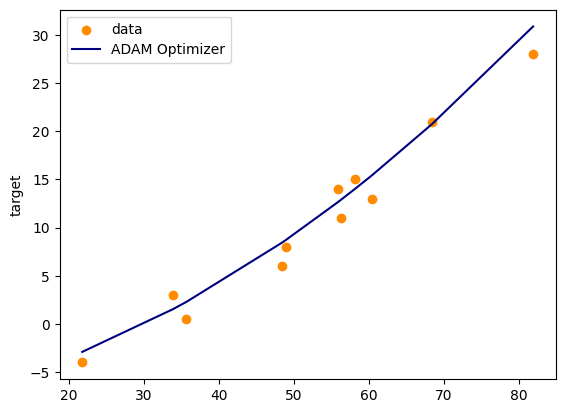

In [15]:
sorted_indices = t_u.argsort()
t_u_sorted = t_u[sorted_indices]
t_c_sorted = t_c[sorted_indices]
params5_np = params5.detach().numpy()
plt.scatter(t_u_sorted, t_c_sorted, color='darkorange', label='data')
plt.plot(t_u_sorted, model(t_u_sorted, *params5_np), color='navy', label='ADAM Optimizer')
plt.ylabel('target')
plt.legend()
plt.show()


 2.a. Develop preprocessing and a training loop to train a linear regression model that predicts housing price based on the following input variables:

area, bedrooms, bathrooms, stories, parking

For this, you need to use the housing dataset. For training and validation, use 80% (training) and 20% (validation) split. Identify the best parameters for your linear regression model based on the above input variables. In this case, you will have six parameters:

2.b Use 5000 epochs for your training. Explore different learning rates from 0.1 to 0.0001 (you need four separate trainings). Report your loss and validation accuracy for every 500 epochs per training. Pick the best linear model.

2.c. Compare your results against the linear regression done in homework 1. Do you see meaningful differences?

In [16]:
import pandas as pd
import numpy as np

In [17]:
housing_data = pd.read_csv("/content/drive/MyDrive/Housing.csv")
new_data = housing_data[['price','area', 'bedrooms', 'bathrooms', 'stories', 'parking']].replace({'yes':1,'no':0})
x = new_data.iloc[:,1:]
m = x.shape[0]
y = np.array(new_data.iloc[:,0]).reshape(m,1)
x = np.array(x)
f_col = np.ones((m,1))
x = np.hstack((f_col,x))
x

array([[1.00e+00, 7.42e+03, 4.00e+00, 2.00e+00, 3.00e+00, 2.00e+00],
       [1.00e+00, 8.96e+03, 4.00e+00, 4.00e+00, 4.00e+00, 3.00e+00],
       [1.00e+00, 9.96e+03, 3.00e+00, 2.00e+00, 2.00e+00, 2.00e+00],
       ...,
       [1.00e+00, 3.62e+03, 2.00e+00, 1.00e+00, 1.00e+00, 0.00e+00],
       [1.00e+00, 2.91e+03, 3.00e+00, 1.00e+00, 1.00e+00, 0.00e+00],
       [1.00e+00, 3.85e+03, 3.00e+00, 1.00e+00, 2.00e+00, 0.00e+00]])

In [18]:
x_tensor = torch.tensor(x,dtype=torch.float64)
y_tensor = torch.tensor(y,dtype=torch.float64)

In [19]:
n_samples = x_tensor.shape[0]
n_val = int(0.2*n_samples)
shuffled_indices = torch.randperm(n_samples)
train_indices = shuffled_indices[:-n_val]
val_indices = shuffled_indices[-n_val:]
train_x = x_tensor[train_indices]
train_y = y_tensor[train_indices]
val_x = x_tensor[val_indices]
val_y = y_tensor[val_indices]


In [20]:
def new_model(x,b,w1,w2,w3,w4,w5):
  predicted = x[:, 0] * b + x[:, 1] * w1 + x[:, 2] * w2 + x[:, 3] * w3 + x[:, 4] * w4 + x[:,5]*w5
  return predicted
def new_loss(pred,actual):
  mse = torch.mean((pred - actual) ** 2)
  rmse = torch.sqrt(mse)
  return rmse

In [21]:
def new_training_loop(n_epochs,optimizer,params,train_x,train_y,val_x,val_y):
  train_loss_list = []
  val_loss_list = []
  for epoch in range(1,n_epochs+1):
    train_pred = new_model(train_x,*params)
    train_loss = new_loss(train_pred,train_y)
    val_pred = new_model(val_x,*params)
    val_loss = new_loss(val_pred,val_y)
    optimizer.zero_grad()
    train_loss.backward()
    optimizer.step()
    train_loss_list.append(train_loss.item())
    val_loss_list.append(val_loss.item())
    if epoch % 500==0:
      print(f"Epoch {epoch }, Training Loss {float(train_loss)}, Validation loss {float(val_loss)}")
  return params,train_loss_list, val_loss_list

Learning rate 0.0001

In [22]:
params = torch.tensor([1.0, 0.0, 0.0,1.0,2.0,0.0], requires_grad=True)
learning_rate = 0.0001
optimizer_sgd = optim.SGD([params], lr=learning_rate)
params1 = torch.tensor([1.0, 3.0, 0.0,1.0,0.0,1.0], requires_grad=True)
optimizer_adam = optim.Adam([params1], lr=learning_rate)

In [23]:
sgd_params,sgd_t_loss,sgd_v_loss = new_training_loop(5000,optimizer_sgd,params,train_x,train_y,val_x,val_y)
#sgd_t_loss = np.array(train_loss_list)
#sgd_v_loss = np.array([item.detach().item() for item in sgd_v_loss])
sgd_params

Epoch 500, Training Loss 4030350.0677602533, Validation loss 4198532.444677034
Epoch 1000, Training Loss 3260800.7707119854, Validation loss 3485723.6081107445
Epoch 1500, Training Loss 2843860.3395790523, Validation loss 3076306.5709386133
Epoch 2000, Training Loss 2676757.3173666974, Validation loss 2889326.778060193
Epoch 2500, Training Loss 2621878.863670171, Validation loss 2812668.156164666
Epoch 3000, Training Loss 2605337.0574354343, Validation loss 2780870.9996293867
Epoch 3500, Training Loss 2600492.665473132, Validation loss 2766820.3949516783
Epoch 4000, Training Loss 2599086.228691588, Validation loss 2760184.1939506796
Epoch 4500, Training Loss 2598678.9371812227, Validation loss 2756886.133468981
Epoch 5000, Training Loss 2598561.0463916864, Validation loss 2755191.290919375


tensor([1.2496e+00, 7.7155e+02, 7.1934e-01, 1.3017e+00, 2.4363e+00, 1.0270e-01],
       requires_grad=True)

In [24]:
adam_params,adam_t_loss,adam_v_loss = new_training_loop(5000,optimizer_adam,params1,train_x,train_y,val_x,val_y)
#adam_t_loss= np.array([item.detach().item() for item in adam_t_loss])
#adam_v_loss  = np.array([item.detach().item() for item in adam_v_loss])
adam_params

Epoch 500, Training Loss 5090574.711449247, Validation loss 5163903.546892954
Epoch 1000, Training Loss 5090330.580057255, Validation loss 5163681.697324429
Epoch 1500, Training Loss 5090086.452783639, Validation loss 5163459.85144872
Epoch 2000, Training Loss 5089842.329631106, Validation loss 5163238.009268344
Epoch 2500, Training Loss 5089598.210600252, Validation loss 5163016.170783774
Epoch 3000, Training Loss 5089354.095724996, Validation loss 5162794.336027561
Epoch 3500, Training Loss 5089109.984972605, Validation loss 5162572.504968107
Epoch 4000, Training Loss 5088865.87834367, Validation loss 5162350.67760589
Epoch 4500, Training Loss 5088621.775838785, Validation loss 5162128.853941385
Epoch 5000, Training Loss 5088377.677458542, Validation loss 5161907.0339750685


tensor([1.5001, 3.4995, 0.5000, 1.5001, 0.5000, 1.5001], requires_grad=True)

Learning rate : 0.001

In [25]:
params2 = torch.tensor([1.0, 2.0, 0.0,1.0,2.0,0.0], requires_grad=True)
learning_rate1 = 0.001
optimizer_sgd1 = optim.SGD([params2], lr=learning_rate1)
params3 = torch.tensor([1.0, 3.0, 0.0,1.0,0.0,1.0], requires_grad=True)
optimizer_adam1 = optim.Adam([params3], lr=learning_rate1)

In [26]:
sgd_params1,sgd_t_loss1,sgd_v_loss1 = new_training_loop(5000,optimizer_sgd1,params2,train_x,train_y,val_x,val_y)
#sgd_t_loss1 = np.array([item.detach().item() for item in sgd_t_loss1])
#sgd_v_loss1 = np.array([item.detach().item() for item in sgd_v_loss1])
sgd_params1

Epoch 500, Training Loss 2598559.009919631, Validation loss 2755149.6394034056
Epoch 1000, Training Loss 2598512.6135043516, Validation loss 2753292.21444972
Epoch 1500, Training Loss 2598512.148400744, Validation loss 2753289.452013807
Epoch 2000, Training Loss 2598511.683458243, Validation loss 2753288.8170985742
Epoch 2500, Training Loss 2598511.21851706, Validation loss 2753288.1821844536
Epoch 3000, Training Loss 2598510.753577195, Validation loss 2753287.5472714454
Epoch 3500, Training Loss 2598510.2886470295, Validation loss 2753286.9123712233
Epoch 4000, Training Loss 2598509.8237222326, Validation loss 2753286.2774777752
Epoch 4500, Training Loss 2598509.3587488146, Validation loss 2753285.6425161487
Epoch 5000, Training Loss 2598508.893799611, Validation loss 2753285.0075867097


tensor([2.4806e+00, 7.7432e+02, 4.0961e+00, 2.6397e+00, 4.4679e+00, 1.1025e-01],
       requires_grad=True)

In [27]:
adam_params1,adam_t_loss1,adam_v_loss1= new_training_loop(5000,optimizer_adam1,params3,train_x,train_y,val_x,val_y)
#adam_t_loss1= np.array([item.detach().item() for item in adam_t_loss1])
#adam_v_loss1  = np.array([item.detach().item() for item in adam_v_loss1])
adam_params1

Epoch 500, Training Loss 5088379.749218482, Validation loss 5161908.916869346
Epoch 1000, Training Loss 5085936.66581645, Validation loss 5159688.806689326
Epoch 1500, Training Loss 5083493.996339261, Validation loss 5157469.067577402
Epoch 2000, Training Loss 5081051.741441357, Validation loss 5155249.700070791
Epoch 2500, Training Loss 5078609.901644933, Validation loss 5153030.704574133
Epoch 3000, Training Loss 5076168.47754903, Validation loss 5150812.081568222
Epoch 3500, Training Loss 5073727.469677445, Validation loss 5148593.831458701
Epoch 4000, Training Loss 5071287.624808449, Validation loss 5146376.63276179
Epoch 4500, Training Loss 5068848.613188924, Validation loss 5144160.185783414
Epoch 5000, Training Loss 5066410.019277756, Validation loss 5141944.1128693465


tensor([5.9997, 7.9990, 4.9997, 5.9997, 4.9997, 5.9987], requires_grad=True)

Learning rate : 0.01

In [28]:
params4 = torch.tensor([1.0, 2.0, 0.0,1.0,2.0,0.0], requires_grad=True)
learning_rate2 = 0.01
optimizer_sgd1 = optim.SGD([params4], lr=learning_rate2)
params5 = torch.tensor([1.0, 3.0, 0.0,1.0,0.0,1.0], requires_grad=True)
optimizer_adam1 = optim.Adam([params5], lr=learning_rate2)

In [29]:
sgd_params2,sgd_t_loss2,sgd_v_loss2 = new_training_loop(5000,optimizer_sgd1,params4,train_x,train_y,val_x,val_y)
#sgd_t_loss2 = np.array([item.detach().item() for item in sgd_t_loss2])
#sgd_v_loss2 = np.array([item.detach().item() for item in sgd_v_loss2])
sgd_params2

Epoch 500, Training Loss 2598508.903513929, Validation loss 2753284.85720211
Epoch 1000, Training Loss 2598504.2542535723, Validation loss 2753280.553788163
Epoch 1500, Training Loss 2598499.6050569774, Validation loss 2753276.2504548803
Epoch 2000, Training Loss 2598494.955931987, Validation loss 2753271.9472134495
Epoch 2500, Training Loss 2598490.3071170733, Validation loss 2753267.6852967916
Epoch 3000, Training Loss 2598485.658318015, Validation loss 2753263.3824808192
Epoch 3500, Training Loss 2598481.009340383, Validation loss 2753259.0794092696
Epoch 4000, Training Loss 2598476.3603545516, Validation loss 2753254.7763185534
Epoch 4500, Training Loss 2598471.7109835385, Validation loss 2753250.4726977157
Epoch 5000, Training Loss 2598467.061314449, Validation loss 2753246.2095758915


tensor([1.4792e+01, 7.7429e+02, 3.7855e+01, 1.6016e+01, 2.4781e+01, 1.8454e-01],
       requires_grad=True)

In [30]:
adam_params2,adam_t_loss2,adam_v_loss2 = new_training_loop(5000,optimizer_adam1,params5,train_x,train_y,val_x,val_y)
#adam_t_loss2= np.array([item.detach().item() for item in adam_t_loss2])
#adam_v_loss2  = np.array([item.detach().item() for item in adam_v_loss2])
adam_params2

Epoch 500, Training Loss 5066458.137949654, Validation loss 5141987.840641297
Epoch 1000, Training Loss 5042108.440571222, Validation loss 5119859.729147592
Epoch 1500, Training Loss 5017815.715572119, Validation loss 5097782.767198096
Epoch 2000, Training Loss 4993577.996792964, Validation loss 5075755.101499079
Epoch 2500, Training Loss 4969393.188295189, Validation loss 5053774.7585393675
Epoch 3000, Training Loss 4945259.86812389, Validation loss 5031840.37492412
Epoch 3500, Training Loss 4921179.528197107, Validation loss 5009953.233175788
Epoch 4000, Training Loss 4897145.712305136, Validation loss 4988107.389395059
Epoch 4500, Training Loss 4873166.010229464, Validation loss 4966309.663477647
Epoch 5000, Training Loss 4849233.031956273, Validation loss 4944553.257394878


tensor([50.9461, 52.8775, 49.9406, 50.9355, 49.9402, 50.8780],
       requires_grad=True)

Learning rate : 0.1

In [31]:
params6 = torch.tensor([1.0, 2.0, 0.0,1.0,2.0,0.0], requires_grad=True)
learning_rate1 = 0.1
optimizer_sgd1 = optim.SGD([params6], lr=learning_rate1)
params7 = torch.tensor([1.0, 3.0, 0.0,1.0,0.0,1.0], requires_grad=True)
optimizer_adam1 = optim.Adam([params7], lr=learning_rate1)

In [32]:
sgd_params3,sgd_t_loss3,sgd_v_loss3 = new_training_loop(5000,optimizer_sgd1,params6,train_x,train_y,val_x,val_y)
#sgd_t_loss3 = np.array([item.detach().item() for item in sgd_t_loss3])
#sgd_v_loss3 = np.array([item.detach().item() for item in sgd_v_loss3])
sgd_params3

Epoch 500, Training Loss 2598467.1613564994, Validation loss 2753246.3871134394
Epoch 1000, Training Loss 2598420.6736395857, Validation loss 2753203.4404546362
Epoch 1500, Training Loss 2598374.188379182, Validation loss 2753160.4964225576
Epoch 2000, Training Loss 2598327.7071718485, Validation loss 2753117.5571707333
Epoch 2500, Training Loss 2598281.2284018383, Validation loss 2753074.620503346
Epoch 3000, Training Loss 2598234.7520950516, Validation loss 2753031.6864774995
Epoch 3500, Training Loss 2598188.2774861925, Validation loss 2752988.7130893716
Epoch 4000, Training Loss 2598141.8075946593, Validation loss 2752945.7863603905
Epoch 4500, Training Loss 2598095.339381043, Validation loss 2752902.8612043303
Epoch 5000, Training Loss 2598048.871353891, Validation loss 2752859.9355514077


tensor([137.8786, 774.0184, 375.4056, 149.7614, 227.8626,   0.9246],
       requires_grad=True)

In [33]:
adam_params3,adam_t_loss3,adam_v_loss3 = new_training_loop(5000,optimizer_adam1,params7,train_x,train_y,val_x,val_y)
#adam_t_loss3= np.array([item.detach().item() for item in adam_t_loss3])
#adam_v_loss3  = np.array([item.detach().item() for item in adam_v_loss3])
adam_params3

Epoch 500, Training Loss 4850021.24510962, Validation loss 4945269.791828916
Epoch 1000, Training Loss 4615529.204083893, Validation loss 4732022.1768792495
Epoch 1500, Training Loss 4388550.549182809, Validation loss 4525387.467398491
Epoch 2000, Training Loss 4169936.1931870794, Validation loss 4326020.023605982
Epoch 2500, Training Loss 3960695.094077941, Validation loss 4134687.17402296
Epoch 3000, Training Loss 3762005.856651473, Validation loss 3952276.6183272917
Epoch 3500, Training Loss 3575213.8129354315, Validation loss 3779793.7933652657
Epoch 4000, Training Loss 3401803.4069378665, Validation loss 3618342.688544667
Epoch 4500, Training Loss 3243338.1563211144, Validation loss 3469086.5966461203
Epoch 5000, Training Loss 3101358.552291279, Validation loss 3333183.5530170267


tensor([486.4085, 475.2581, 484.4393, 484.4492, 484.2874, 473.3655],
       requires_grad=True)

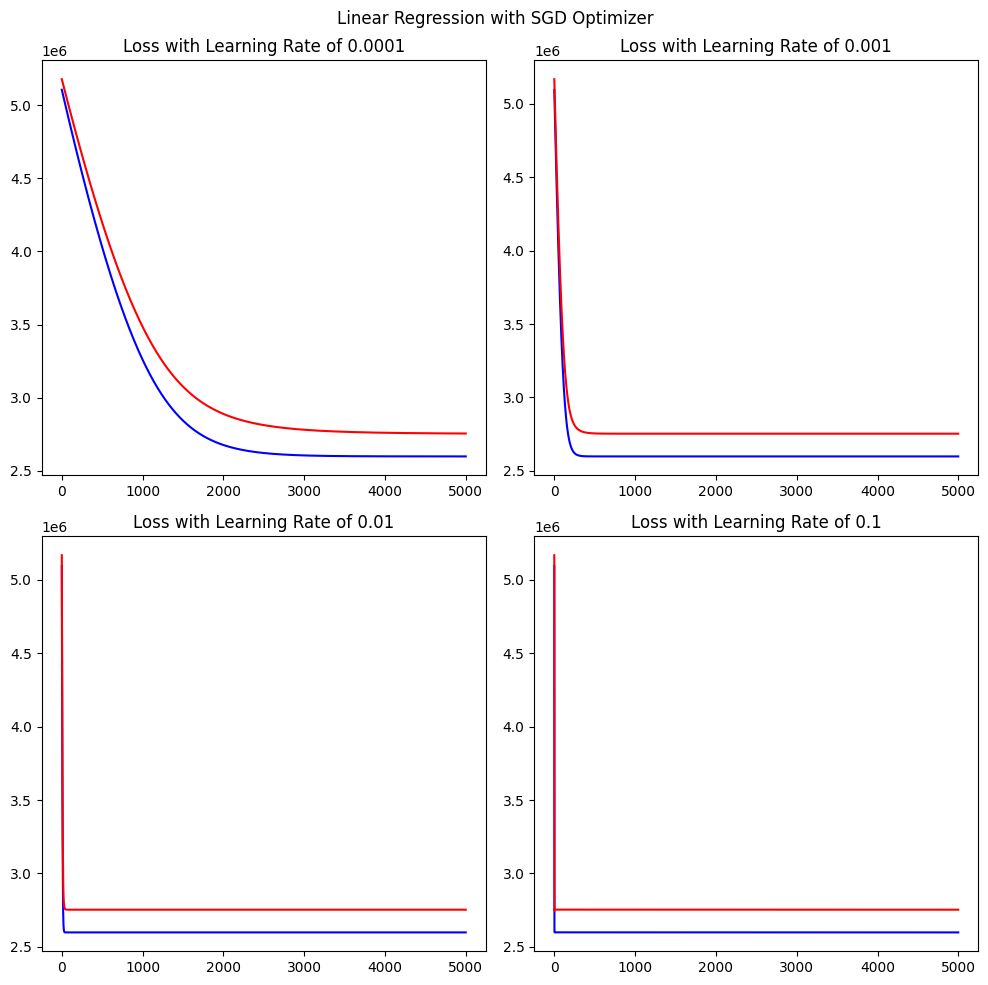

In [34]:
plt.figure(figsize=(10, 10))
plt.suptitle('Linear Regression with SGD Optimizer')

plt.subplot(2,2,1)
plt.plot(sgd_t_loss, color='blue')
plt.plot(sgd_v_loss, color='red')
plt.title('Loss with Learning Rate of 0.0001')

plt.subplot(2,2,2)
plt.plot(sgd_t_loss1, color='blue')
plt.plot(sgd_v_loss1, color='red')
plt.title('Loss with Learning Rate of 0.001')

plt.subplot(2,2,3)
plt.plot(sgd_t_loss2, color='blue')
plt.plot(sgd_v_loss2, color='red')
plt.title('Loss with Learning Rate of 0.01')

plt.subplot(2,2,4)
plt.plot(sgd_t_loss3, color='blue')
plt.plot(sgd_v_loss3, color='red')
plt.title('Loss with Learning Rate of 0.1')

plt.tight_layout()
plt.show()

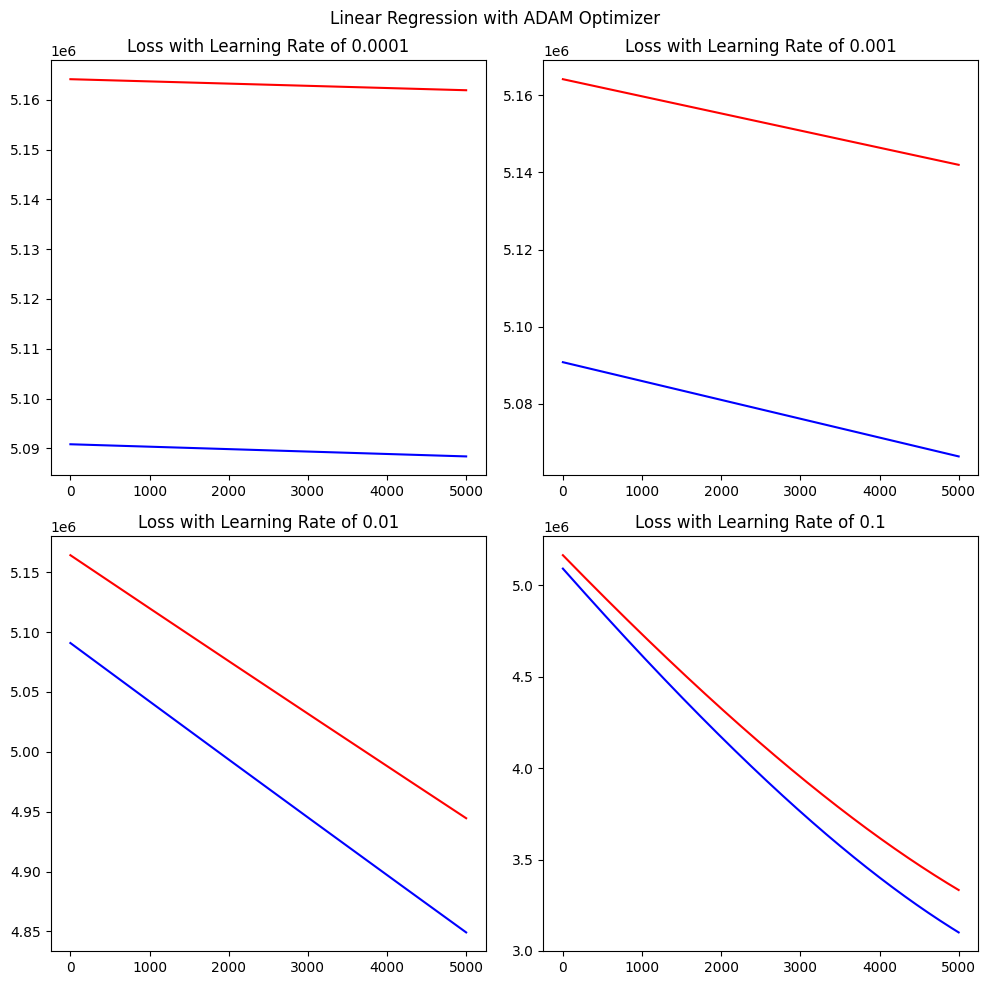

In [36]:
plt.figure(figsize=(10, 10))
plt.suptitle('Linear Regression with ADAM Optimizer')

plt.subplot(2,2,1)
plt.plot(adam_t_loss, color='blue')
plt.plot(adam_v_loss, color='red')
plt.title('Loss with Learning Rate of 0.0001')

plt.subplot(2,2,2)
plt.plot(adam_t_loss1, color='blue')
plt.plot(adam_v_loss1, color='red')
plt.title('Loss with Learning Rate of 0.001')

plt.subplot(2,2,3)
plt.plot(adam_t_loss2, color='blue')
plt.plot(adam_v_loss2, color='red')
plt.title('Loss with Learning Rate of 0.01')

plt.subplot(2,2,4)
plt.plot(adam_t_loss3, color='blue')
plt.plot(adam_v_loss3, color='red')
plt.title('Loss with Learning Rate of 0.1')

plt.tight_layout()
plt.show()

Best linear model: Learning rate: 0.1 , optimizer = SGD and
tensor([1.2487e+00, 7.8104e+02, 6.9679e-01, 1.2953e+00, 2.4271e+00, 1.0911e-01],
       requires_grad=True)



*  1.2487e+00 -> 1.2487
*  7.8104e+02 -> 781.04
*   6.9679e-01 -> 0.69679
*   1.2953e+00 -> 1.2953
*   2.4271e+00 -> 24.271
*  1.0911e-01 -> 0.10911



Problem 3 (30 pts):

Repeat all sections of problem 2 using all the input features from the housing price dataset.

In [62]:
from sklearn.preprocessing import StandardScaler
standard = StandardScaler()

In [63]:
new_data = housing_data.replace({'furnished':1,'semi-furnished':0,'unfurnished':2})
new_data = new_data.replace({'yes':1,'no':0})
x = new_data.iloc[:,1:]
m = x.shape[0]
y = np.array(new_data.iloc[:,0]).reshape(m,1)
x = np.array(x)
f_col = np.ones((m,1))
x = np.hstack((f_col,x))
x.shape

(545, 13)

In [64]:
x_tensor = torch.tensor(x,dtype=torch.float64)
y_tensor = torch.tensor(y,dtype=torch.float64)
n_samples = x_tensor.shape[0]
n_val = int(0.2*n_samples)
shuffled_indices = torch.randperm(n_samples)
train_indices = shuffled_indices[:-n_val]
val_indices = shuffled_indices[-n_val:]
train_x = x_tensor[train_indices]
train_y = y_tensor[train_indices]
val_x = x_tensor[val_indices]
val_y = y_tensor[val_indices]

In [65]:
def full_model(x,b,w1,w2,w3,w4,w5,w6,w7,w8,w9,w10,w11,w12):
  return x[:, 0] * b + x[:, 1] * w1 + x[:, 2] * w2 + x[:, 3] * w3 + x[:, 4] * w4 + x[:,5]*w5 + x[:, 4] * w4 + x[:, 5] * w5 + x[:,6]*w6+ x[:, 7] * w7 + x[:, 8] * w8+ x[:,9]*w9+ x[:, 10] * w10 + x[:, 11] * w11 + x[:,12]*w12

In [66]:
def new_training_loop(n_epochs,optimizer,params,train_x,train_y,val_x,val_y):
  train_loss_list = []
  val_loss_list = []
  for epoch in range(1,n_epochs+1):
    train_pred = full_model(train_x,*params)
    train_loss = new_loss(train_pred,train_y)
    val_pred = full_model(val_x,*params)
    val_loss = new_loss(val_pred,val_y)
    optimizer.zero_grad()
    train_loss.backward()
    optimizer.step()
    train_loss_list.append(train_loss.item())
    val_loss_list.append(val_loss.item())
    if epoch % 500==0:
      print(f"Epoch {epoch }, Training Loss {float(train_loss)}, Validation loss {float(val_loss)}")
  return params,train_loss_list, val_loss_list

In [67]:
learning_rate = 0.0001
learning_rate1 = 0.001
learning_rate2 = 0.01
learning_rate3 = 0.1
params = torch.tensor([1.0, 2.0, 0.0,1.0,2.0,0.0,0.0,1.0,0.0,0.0,2.0,1.0,2.0], requires_grad=True)
optimizer_sgd = optim.SGD([params], lr=learning_rate)
params1 = torch.tensor([1.0, 2.0, 0.0,1.0,2.0,0.0,0.0,1.0,0.0,0.0,2.0,1.0,2.0], requires_grad=True)
optimizer_sgd1 = optim.SGD([params1], lr=learning_rate1)
params2 = torch.tensor([1.0, 2.0, 0.0,1.0,2.0,0.0,0.0,1.0,0.0,0.0,2.0,1.0,2.0], requires_grad=True)
optimizer_sgd2 = optim.SGD([params2], lr=learning_rate2)
params3 = torch.tensor([1.0, 2.0, 0.0,1.0,2.0,0.0,0.0,1.0,0.0,0.0,2.0,1.0,2.0], requires_grad=True)
optimizer_sgd3 = optim.SGD([params3], lr=learning_rate3)

In [68]:
sgd_params,sgd_t_loss,sgd_v_loss = new_training_loop(5000,optimizer_sgd,params,train_x,train_y,val_x,val_y)
sgd_params

Epoch 500, Training Loss 4028932.448362926, Validation loss 4226432.237088911
Epoch 1000, Training Loss 3264157.405479351, Validation loss 3499332.38542623
Epoch 1500, Training Loss 2833253.411602784, Validation loss 3105477.129155262
Epoch 2000, Training Loss 2651975.462778932, Validation loss 2948194.72854471
Epoch 2500, Training Loss 2589798.3851676686, Validation loss 2898240.9581551384
Epoch 3000, Training Loss 2570370.0005301796, Validation loss 2884685.8134955256
Epoch 3500, Training Loss 2564495.6117204344, Validation loss 2881695.4323430452
Epoch 4000, Training Loss 2562737.585516198, Validation loss 2881404.6651000706
Epoch 4500, Training Loss 2562213.0857532523, Validation loss 2881647.685631152
Epoch 5000, Training Loss 2562056.7126685698, Validation loss 2881900.0793197528


tensor([1.2511e+00, 7.8552e+02, 7.2258e-01, 1.3102e+00, 2.8780e+00, 3.7591e-01,
        3.6175e-02, 1.0775e+00, 1.0939e-02, 4.9796e-02, 2.1032e+00, 1.0334e+00,
        2.2545e+00], requires_grad=True)

In [69]:
sgd_params1,sgd_t_loss1,sgd_v_loss1 = new_training_loop(5000,optimizer_sgd1,params1,train_x,train_y,val_x,val_y)
sgd_params1

Epoch 500, Training Loss 2562054.7170097963, Validation loss 2881905.4700129707
Epoch 1000, Training Loss 2561989.524237049, Validation loss 2882313.5416447925
Epoch 1500, Training Loss 2561988.6691767517, Validation loss 2882313.4509185613
Epoch 2000, Training Loss 2561987.814350356, Validation loss 2882312.6841520933
Epoch 2500, Training Loss 2561986.9594831667, Validation loss 2882311.9173517083
Epoch 3000, Training Loss 2561986.1046211887, Validation loss 2882311.1505563813
Epoch 3500, Training Loss 2561985.249763939, Validation loss 2882310.38376554
Epoch 4000, Training Loss 2561984.3949113777, Validation loss 2882309.616979095
Epoch 4500, Training Loss 2561983.5400635363, Validation loss 2882308.8501970796
Epoch 5000, Training Loss 2561982.685220592, Validation loss 2882308.0834196494


tensor([2.4565e+00, 7.8882e+02, 4.0565e+00, 2.6949e+00, 6.8987e+00, 1.8006e+00,
        1.3258e-01, 1.4012e+00, 5.9156e-02, 9.9716e-02, 2.0597e+00, 9.9386e-01,
        3.6155e+00], requires_grad=True)

In [70]:
sgd_params2,sgd_t_loss2,sgd_v_loss2 = new_training_loop(5000,optimizer_sgd2,params2,train_x,train_y,val_x,val_y)
sgd_params2

Epoch 500, Training Loss 2561982.7032527514, Validation loss 2882307.8361288
Epoch 1000, Training Loss 2561974.155493473, Validation loss 2882299.334617696
Epoch 1500, Training Loss 2561965.607879449, Validation loss 2882290.8332437407
Epoch 2000, Training Loss 2561957.0607596175, Validation loss 2882282.3235439644
Epoch 2500, Training Loss 2561948.5139463255, Validation loss 2882273.8229152705
Epoch 3000, Training Loss 2561939.967174005, Validation loss 2882265.3223179253
Epoch 3500, Training Loss 2561931.420146399, Validation loss 2882256.821496942
Epoch 4000, Training Loss 2561922.872648937, Validation loss 2882248.3202592647
Epoch 4500, Training Loss 2561914.3252077596, Validation loss 2882239.810291073
Epoch 5000, Training Loss 2561905.777995132, Validation loss 2882231.3092889027


tensor([1.4503e+01, 7.8877e+02, 3.7377e+01, 1.6534e+01, 4.7078e+01, 1.6039e+01,
        1.0954e+00, 4.6338e+00, 5.4103e-01, 5.9695e-01, 1.6240e+00, 5.9835e-01,
        1.7224e+01], requires_grad=True)

In [71]:
sgd_params3,sgd_t_loss3,sgd_v_loss3 = new_training_loop(5000,optimizer_sgd3,params3,train_x,train_y,val_x,val_y)
sgd_params3

Epoch 500, Training Loss 2561905.959912727, Validation loss 2882231.4724775096
Epoch 1000, Training Loss 2561820.4992215578, Validation loss 2882146.455775141
Epoch 1500, Training Loss 2561735.05131701, Validation loss 2882061.451223065
Epoch 2000, Training Loss 2561649.6159519167, Validation loss 2881976.4583767545
Epoch 2500, Training Loss 2561564.193786968, Validation loss 2881891.4781242246
Epoch 3000, Training Loss 2561478.7825119756, Validation loss 2881806.499530315
Epoch 3500, Training Loss 2561393.3857928356, Validation loss 2881721.55192282
Epoch 4000, Training Loss 2561307.992996616, Validation loss 2881636.599588212
Epoch 4500, Training Loss 2561222.6219703695, Validation loss 2881551.667034783
Epoch 5000, Training Loss 2561137.269029609, Validation loss 2881466.7511302605


tensor([134.9446, 788.2420, 370.5088, 154.8715, 448.6638, 158.3826,  10.7191,
         36.9596,   5.3587,   5.5576,  -2.7355,  -3.3600, 153.2737],
       requires_grad=True)

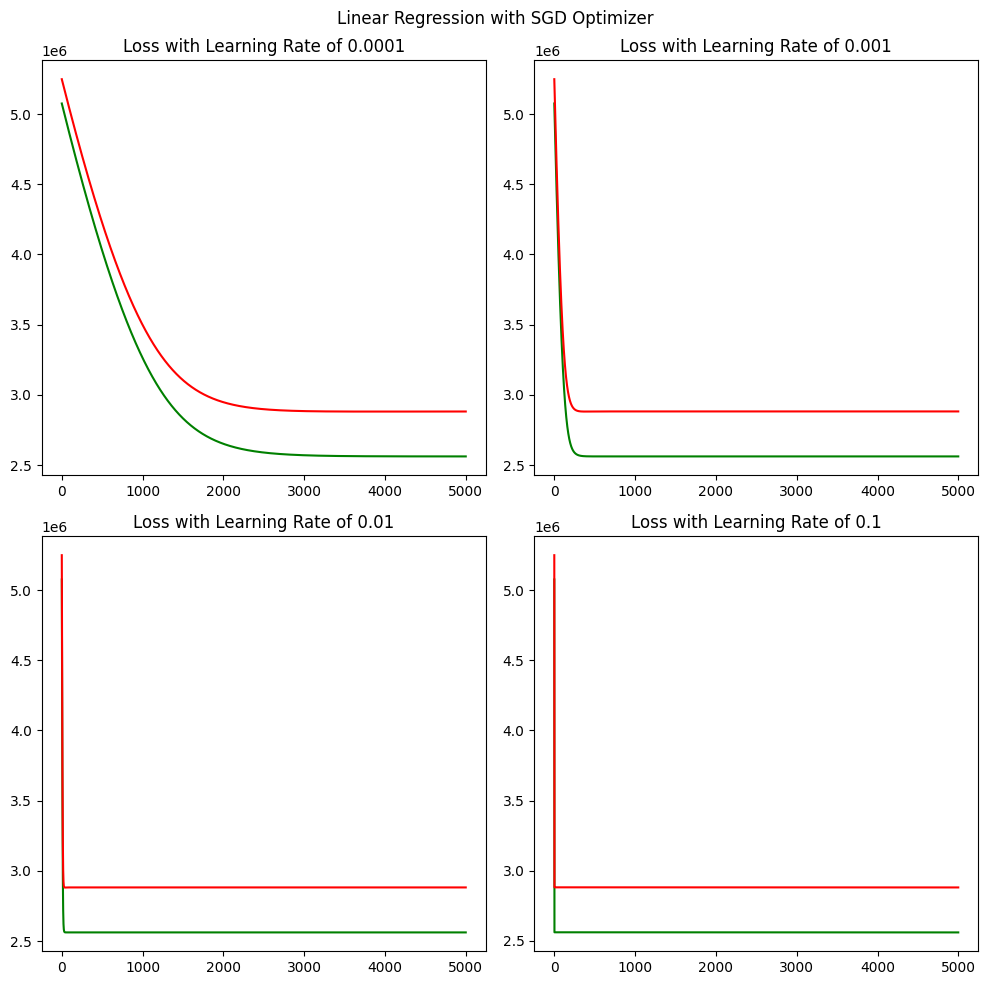

In [72]:
plt.figure(figsize=(10, 10))
plt.suptitle('Linear Regression with all the inputs SGD Optimizer')

plt.subplot(2,2,1)
plt.plot(sgd_t_loss, color='green')
plt.plot(sgd_v_loss, color='red')
plt.title('Loss with Learning Rate of 0.0001')

plt.subplot(2,2,2)
plt.plot(sgd_t_loss1, color='green')
plt.plot(sgd_v_loss1, color='red')
plt.title('Loss with Learning Rate of 0.001')

plt.subplot(2,2,3)
plt.plot(sgd_t_loss2, color='green')
plt.plot(sgd_v_loss2, color='red')
plt.title('Loss with Learning Rate of 0.01')

plt.subplot(2,2,4)
plt.plot(sgd_t_loss3, color='green')
plt.plot(sgd_v_loss3, color='red')
plt.title('Loss with Learning Rate of 0.1')

plt.tight_layout()
plt.show()

In [73]:
params4 = torch.tensor([1.0, 2.0, 0.0,1.0,2.0,0.0,0.0,1.0,0.0,0.0,2.0,1.0,2.0], requires_grad=True)
optimizer_adam = optim.Adam([params4], lr=learning_rate)
params5 = torch.tensor([1.0, 2.0, 0.0,1.0,2.0,0.0,0.0,1.0,0.0,0.0,2.0,1.0,2.0], requires_grad=True)
optimizer_adam1 = optim.Adam([params5], lr=learning_rate1)
params6 = torch.tensor([1.0, 2.0, 0.0,1.0,2.0,0.0,0.0,1.0,0.0,0.0,2.0,1.0,2.0], requires_grad=True)
optimizer_adam2 = optim.Adam([params6], lr=learning_rate2)
params7 = torch.tensor([1.0, 2.0, 0.0,1.0,2.0,0.0,0.0,1.0,0.0,0.0,2.0,1.0,2.0], requires_grad=True)
optimizer_adam3 = optim.Adam([params7], lr=learning_rate3)

In [74]:
adam_params,adam_t_loss,adam_v_loss = new_training_loop(5000,optimizer_adam,params4,train_x,train_y,val_x,val_y)
adam_params

Epoch 500, Training Loss 5075045.041976546, Validation loss 5248005.666262724
Epoch 1000, Training Loss 5074804.34095575, Validation loss 5247768.433380555
Epoch 1500, Training Loss 5074563.643828221, Validation loss 5247531.205113861
Epoch 2000, Training Loss 5074322.950596802, Validation loss 5247293.981465604
Epoch 2500, Training Loss 5074082.261262046, Validation loss 5247056.762436415
Epoch 3000, Training Loss 5073841.57586056, Validation loss 5246819.548063765
Epoch 3500, Training Loss 5073600.894356848, Validation loss 5246582.338311434
Epoch 4000, Training Loss 5073360.216751462, Validation loss 5246345.133180047
Epoch 4500, Training Loss 5073119.543044959, Validation loss 5246107.932670232
Epoch 5000, Training Loss 5072878.873237893, Validation loss 5245870.736782616


tensor([1.5001, 2.4995, 0.5000, 1.5001, 2.4995, 0.5000, 0.5000, 1.5001, 0.5000,
        0.5000, 2.4995, 1.5001, 2.4995], requires_grad=True)

In [75]:
adam_params1,adam_t_loss1,adam_v_loss1 = new_training_loop(5000,optimizer_adam1,params5,train_x,train_y,val_x,val_y)
adam_params1

Epoch 500, Training Loss 5072880.916053593, Validation loss 5245872.750200947
Epoch 1000, Training Loss 5070472.138818722, Validation loss 5243498.785140578
Epoch 1500, Training Loss 5068063.752918991, Validation loss 5241125.283910776
Epoch 2000, Training Loss 5065656.244599225, Validation loss 5238752.725752532
Epoch 2500, Training Loss 5063248.645228243, Validation loss 5236380.156208487
Epoch 3000, Training Loss 5060841.436561222, Validation loss 5234008.050108167
Epoch 3500, Training Loss 5058434.621423437, Validation loss 5231636.410321142
Epoch 4000, Training Loss 5056028.200478828, Validation loss 5229265.237573534
Epoch 4500, Training Loss 5053622.654856235, Validation loss 5226895.005994158
Epoch 5000, Training Loss 5051218.1678959485, Validation loss 5224525.89626311


tensor([5.9997, 6.9992, 4.9997, 5.9997, 6.9996, 4.9996, 4.9992, 5.9997, 4.9997,
        4.9991, 6.9990, 5.9985, 6.9996], requires_grad=True)

In [76]:
adam_params2,adam_t_loss2,adam_v_loss2 = new_training_loop(5000,optimizer_adam2,params6,train_x,train_y,val_x,val_y)
adam_params2

Epoch 500, Training Loss 5051266.15867085, Validation loss 5224573.180207139
Epoch 1000, Training Loss 5027254.9927920215, Validation loss 5200919.619538519
Epoch 1500, Training Loss 5003297.9951038025, Validation loss 5177327.3756118575
Epoch 2000, Training Loss 4979392.615492012, Validation loss 5153794.00632287
Epoch 2500, Training Loss 4955537.526685708, Validation loss 5130318.277291512
Epoch 3000, Training Loss 4931731.069397125, Validation loss 5106898.630468295
Epoch 3500, Training Loss 4907972.623953996, Validation loss 5083534.533569523
Epoch 4000, Training Loss 4884262.058952748, Validation loss 5060225.936467503
Epoch 4500, Training Loss 4860595.886921588, Validation loss 5036969.492787088
Epoch 5000, Training Loss 4836981.982205949, Validation loss 5013773.021549336


tensor([50.9478, 51.8826, 49.9433, 50.9404, 51.9428, 49.9279, 49.9106, 50.9349,
        49.9398, 49.8915, 51.8789, 50.8742, 51.9612], requires_grad=True)

In [77]:
adam_params3,adam_t_loss3,adam_v_loss3 = new_training_loop(5000,optimizer_adam3,params7,train_x,train_y,val_x,val_y)
adam_params3

Epoch 500, Training Loss 4837744.984031007, Validation loss 5014522.39753099
Epoch 1000, Training Loss 4606138.222397599, Validation loss 4787492.438388909
Epoch 1500, Training Loss 4381618.613229548, Validation loss 4568350.424554104
Epoch 2000, Training Loss 4164983.306210757, Validation loss 4357937.897321374
Epoch 2500, Training Loss 3957179.523093195, Validation loss 4157233.085591285
Epoch 3000, Training Loss 3759318.8193611256, Validation loss 3967356.180872736
Epoch 3500, Training Loss 3572677.8620400853, Validation loss 3789558.6979387845
Epoch 4000, Training Loss 3398678.558929231, Validation loss 3625190.448630178
Epoch 4500, Training Loss 3238840.8440799722, Validation loss 3475639.155345355
Epoch 5000, Training Loss 3094694.310885962, Validation loss 3342232.5554116257


tensor([486.9984, 475.6824, 485.2845, 485.7279, 487.1431, 482.4431, 479.2067,
        484.6998, 484.5192, 475.4713, 474.9714, 472.8121, 490.2727],
       requires_grad=True)

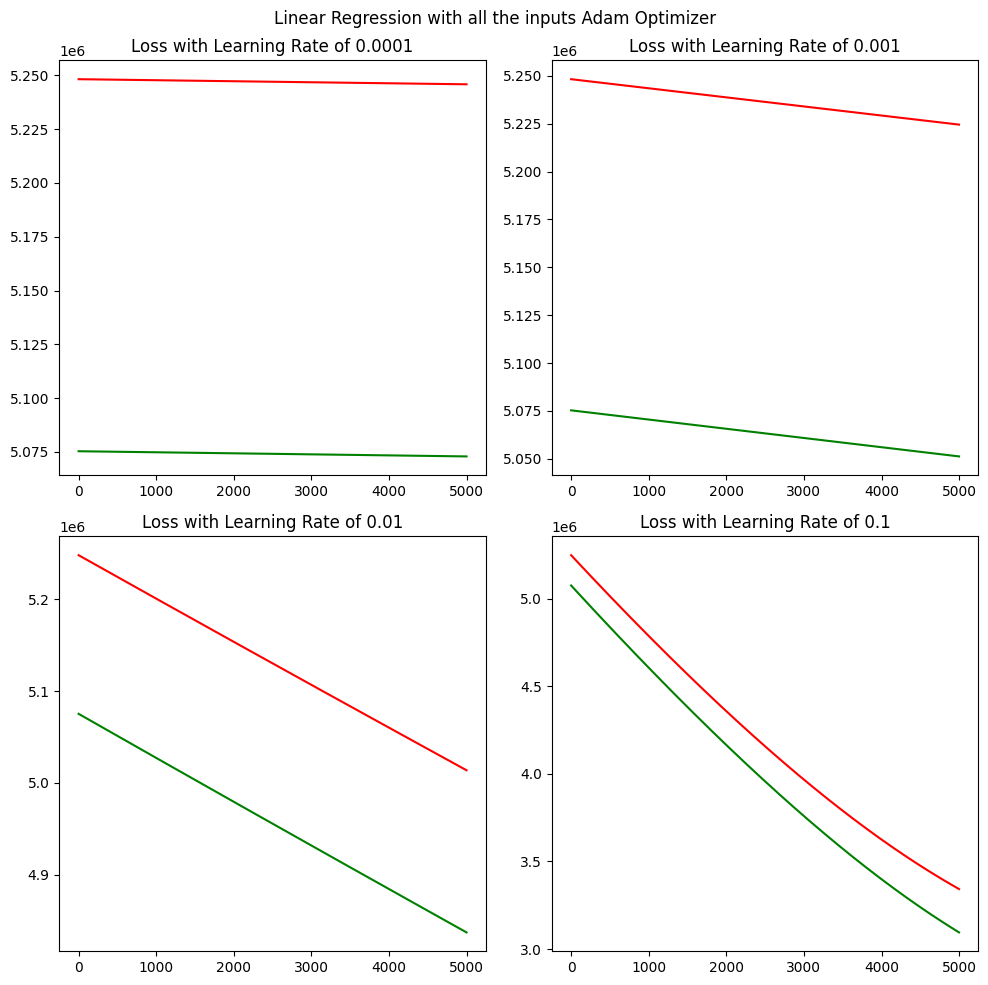

In [79]:
plt.figure(figsize=(10, 10))
plt.suptitle('Linear Regression with all the inputs Adam Optimizer')

plt.subplot(2,2,1)
plt.plot(adam_t_loss, color='green')
plt.plot(adam_v_loss, color='red')
plt.title('Loss with Learning Rate of 0.0001')

plt.subplot(2,2,2)
plt.plot(adam_t_loss1, color='green')
plt.plot(adam_v_loss1, color='red')
plt.title('Loss with Learning Rate of 0.001')

plt.subplot(2,2,3)
plt.plot(adam_t_loss2, color='green')
plt.plot(adam_v_loss2, color='red')
plt.title('Loss with Learning Rate of 0.01')

plt.subplot(2,2,4)
plt.plot(adam_t_loss3, color='green')
plt.plot(adam_v_loss3, color='red')
plt.title('Loss with Learning Rate of 0.1')

plt.tight_layout()
plt.show()